<div align="center">

---

# <span style="color:#4E9CAF"> **Optimization Project 2** </span>
## <span style="color:green"> *Index Fund to Track NASDAQ-100 Index* </span>

---

</div>

### <span style="color:#4E9CAF">**Team Members:**</span>
- <span style="font-style:italic; color:blue">Aakash Dhruva</span> -avd667
- <span style="font-style:italic; color:blue">Aditya Kumar</span> -ak49568
- <span style="font-style:italic; color:blue">Avi Walyat</span> -aw39578
- <span style="font-style:italic; color:blue">Joseph Bridges</span> -jhb2854

---

<div style="page-break-after: always;"></div>


### Importing Libraries

In [36]:
import gurobipy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


import warnings
warnings.filterwarnings("ignore")

stop_time = 1800


#### Part 1 : Reading the csv files of 2019 and 2020 and Calculating the returns and correlation

In [37]:
# Reading the csv file for 2019
stocks_19 = pd.read_csv('stocks2019.csv', header=0)
stocks_19 = stocks_19.set_index(stocks_19.columns[0])
stocks_19 = stocks_19.rename_axis('date')
stocks_19.index = pd.to_datetime(stocks_19.index)

# Reading the csv file for 2020
stocks_20 = pd.read_csv('stocks2020.csv', header=0)
stocks_20 = stocks_20.set_index(stocks_20.columns[0])
stocks_20 = stocks_20.rename_axis('date')
stocks_20.index = pd.to_datetime(stocks_20.index)

In [38]:
stocks_19.head()


,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,182.458298,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,185.824142,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,188.324738,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,190.739777,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180


In [8]:
stocks_20.head()


,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,231.917572,...,36.970001,254.550003,196.729996,150.167465,219.449997,56.046688,167.460007,64.771545,60.782249,100.115349
2020-01-03,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,230.343124,...,36.180000,250.169998,200.880005,151.628220,217.979996,56.046688,168.440002,63.774597,61.074562,97.810677
2020-01-06,8848.519531,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,232.110748,...,35.689999,250.949997,202.740005,151.976013,224.029999,56.530506,169.490005,62.550629,60.986866,95.771927
2020-01-07,8846.450195,59.945747,333.390015,48.250000,106.849998,283.059998,1395.109985,1393.339966,1906.859985,229.927765,...,37.330002,253.089996,203.210007,153.247955,223.789993,56.245903,172.949997,66.785164,60.860199,97.958405
2020-01-08,8912.370117,59.488754,337.869995,47.830002,108.580002,286.000000,1405.040039,1404.319946,1891.969971,230.101654,...,36.869999,258.000000,204.149994,154.658997,231.089996,52.963551,178.710007,67.752487,60.801735,97.682640


In [39]:
# Calculating the returns for 2019
returns_19 = pd.DataFrame(
    data=0, index=stocks_19.index.values, columns=stocks_19.columns.values)
for i in range(1, len(returns_19)):
    for j in range(len(stocks_19.columns)):
        returns_19.iloc[i, j] = (
            stocks_19.iloc[i, j] - stocks_19.iloc[i-1, j])/stocks_19.iloc[i-1, j]


# Calculating the returns for 2020
returns_20 = pd.DataFrame(
    data=0, index=stocks_20.index.values, columns=stocks_20.columns.values)
for i in range(1, len(returns_20)):
    for j in range(len(stocks_20.columns)):
        returns_20.iloc[i, j] = (
            stocks_20.iloc[i, j] - stocks_20.iloc[i-1, j])/stocks_20.iloc[i-1, j]

returns_19 = returns_19[1:]
returns_20 = returns_20[1:]


In [10]:
returns_20.head()


,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
2020-01-03,-0.008827,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,...,-0.021369,-0.017207,0.021095,0.009728,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
2020-01-06,0.006211,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
2020-01-07,-0.000234,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005035,0.020414,0.067698,-0.002077,0.022830
2020-01-08,0.007452,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,...,-0.012323,0.019400,0.004626,0.009208,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
2020-01-09,0.008669,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493


In [11]:
# returns Matrix for the 100 funds present in the NASDAQ-100
returns_matrix_19 = returns_19.drop(returns_19.columns[0], axis=1)
returns_matrix_20 = returns_20.drop(returns_20.columns[0], axis=1)

# Calculating the correlation matrix using the returns_matrix_2019
correlation_matrix_19 = returns_matrix_19.corr()

# Defining an array q to store returns of NDX
q_2019 = returns_19[returns_19.columns[0]]
q_2020 = returns_20[returns_20.columns[0]]

In [40]:
# Calculating the correlation of index
index_corr = returns_19.corr()
index_corr[index_corr.columns[0]].sort_values(ascending=False)

NDX      1.000000
MSFT     0.865583
AMZN     0.820341
AAPL     0.807134
GOOGL    0.756556
           ...   
MRNA     0.243492
EXC      0.161157
BIIB     0.144255
XEL      0.118452
KHC      0.108326
Name: NDX, Length: 101, dtype: float64

#### Part 2 :  Selecting Top 5 Stocks and calculating their weights

In [13]:
# Number of funds
m = 5
# n = min(100, len(returns_matrix_19.columns))
n = len(returns_matrix_19.columns)

# Number of rows
p = len(returns_matrix_19)

# Model
stocks = gp.Model()
stocksy = stocks.addMVar(100, vtype='B')
stocksx = stocks.addMVar((100, 100), vtype='B')
# Constraint 1
stocks.addConstr(gp.quicksum(stocksy[i] for i in range(n)) == m)

# Constraint 2
stocks.addConstrs(gp.quicksum(stocksx[i, j]
                  for j in range(n)) == 1 for i in range(n))

# Constraint 3
stocks.addConstrs(stocksx[i, j] <= stocksy[j]
                  for j in range(n) for i in range(n))

# Objective function
stocks.setObjective(gp.quicksum(stocksx[i, j]*correlation_matrix_19.iloc[i, j] for j in range(n) for i in range(n)),
                    gp.GRB.MAXIMIZE)

stocks.Params.OutputFlag = 0
stocks.optimize()
stocks.ObjVal


Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-27


54.83990652229107

In [14]:
# Index of Selected Stocks
selected_stock_index = [i for i in range(len(stocksy.x)) if stocksy.x[i] == 1]

# Name of Selected Stocks
selected_stocks = [correlation_matrix_19.columns[i]
                   for i in selected_stock_index]

selected_stocks


['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']

In [15]:
# model to calculate the portfolio weights
wt = gp.Model()

# variables
wtx = wt.addMVar(m)
wtz = wt.addMVar(p)

# Objective function
wt.setObjective(gp.quicksum(wtz[i] for i in range(p)), gp.GRB.MINIMIZE)

# Total portfolio weights = 1
wt.addConstr(gp.quicksum(wtx[i] for i in range(m)) == 1)

# Constrain 1
wt.addConstrs(wtz[i] >= q_2019[i] -
              gp.quicksum(wtx[j]*returns_matrix_19.iloc[i,
                          selected_stock_index[j]] for j in range(m))
              for i in range(p))
# Constrain 2
wt.addConstrs(wtz[i] >= gp.quicksum(wtx[j]*returns_matrix_19.iloc[i, selected_stock_index[j]] for j in range(m))
              - q_2019[i] for i in range(p))

wt.Params.OutputFlag = 0
wt.optimize()
wt.ObjVal


0.7891782824631451

In [16]:
# optimal weights
selected_stock_weights = wtx.x
selected_stock_weights


array([0.04886175, 0.21038806, 0.58035198, 0.07119022, 0.089208  ])

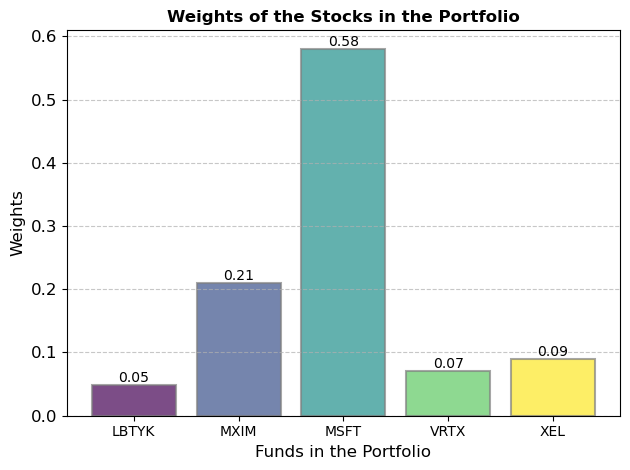

In [17]:
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_stocks)))
bars = plt.bar(selected_stocks, selected_stock_weights,
               color=colors, alpha=0.7, edgecolor='grey', linewidth=1.5)
for bar, weight in zip(bars, selected_stock_weights):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{weight:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Weights of the Stocks in the Portfolio',
          fontsize=12, fontweight='bold')
plt.xlabel('Funds in the Portfolio', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [18]:
# Comparing the performance
Error_2020 = sum(abs(q_2020[i] - sum(selected_stock_weights[j]*returns_matrix_20.iloc[i, selected_stock_index[j]]
                                     for j in range(m))) for i in range(p))
Error_2019 = wt.ObjVal
Error_df = pd.DataFrame(
    {'Year': [2019, 2020], 'Tracking Error': [Error_2019, Error_2020]})
Error_df


,Year,Tracking Error
0,2019,0.789178
1,2020,1.109405


<Figure size 1400x700 with 0 Axes>

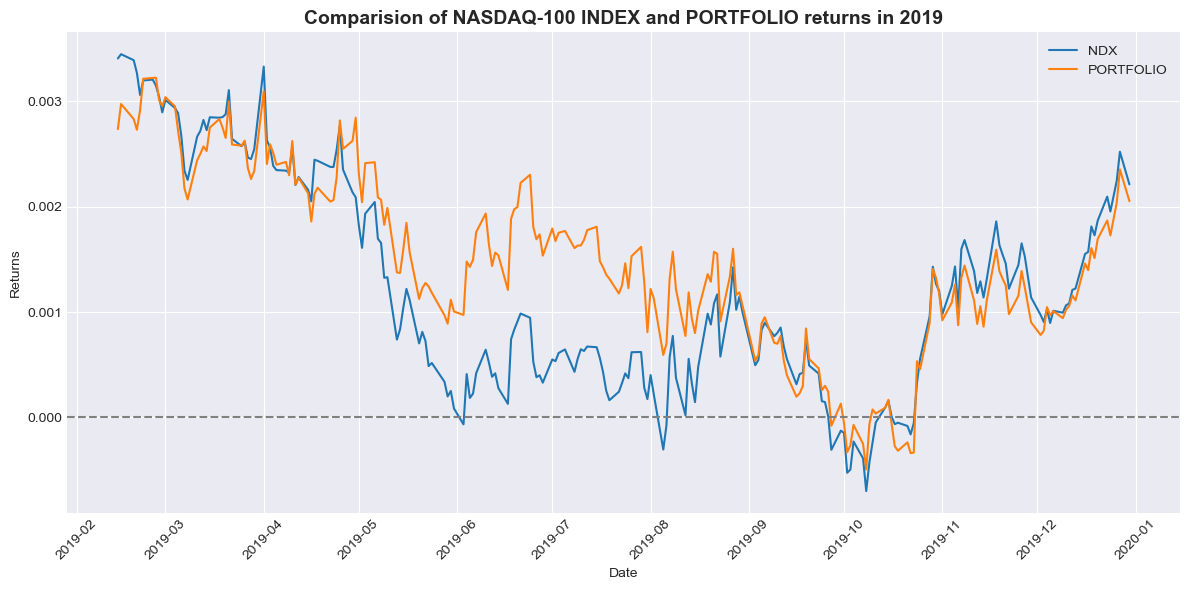

<Figure size 1400x700 with 0 Axes>

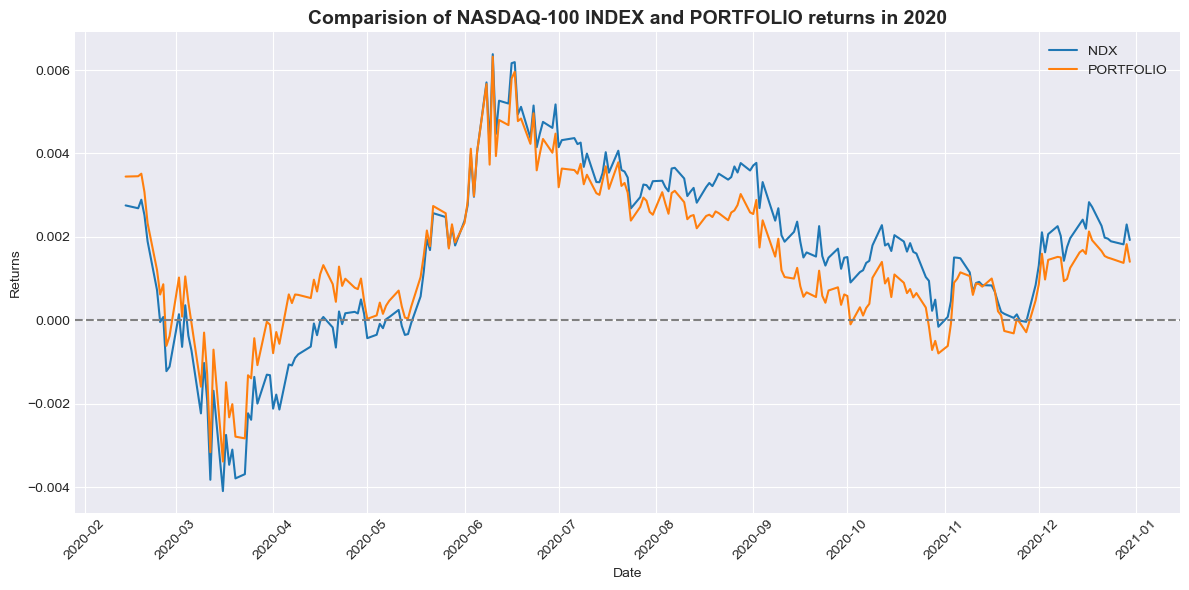

In [19]:
# Daily returns of our portfolio with 5 funds in 2019

daily_portfolio_returns_19 = []
for i in range(p):
    daily = sum(selected_stock_weights[j]*returns_matrix_19.iloc[i,
                selected_stock_index[j]] for j in range(m))
    daily_portfolio_returns_19.append(daily)
returns_19['Portfolio_returns'] = daily_portfolio_returns_19

# Daily returns of portfolio with 5 funds in 2020

daily_portfolio_returns_20 = []
for i in range(len(returns_20)):
    daily = sum(selected_stock_weights[j]*returns_matrix_20.iloc[i,
                selected_stock_index[j]] for j in range(m))
    daily_portfolio_returns_20.append(daily)
returns_20['Portfolio_returns'] = daily_portfolio_returns_20

# NDX returns with Portfolio returns in 2019
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-darkgrid')
index_avg_60_19 = q_2019.rolling(window=60, min_periods=30).mean()
portfolio_avg_60_19 = returns_19['Portfolio_returns'].rolling(
    window=60, min_periods=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(index_avg_60_19, label=returns_19.columns[0])
plt.plot(portfolio_avg_60_19, label='PORTFOLIO')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.legend()
plt.title('Comparision of NASDAQ-100 INDEX and PORTFOLIO returns in 2019',
          fontsize=14, fontweight='bold')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# NDX returns with Portfolio returns in 2020
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-darkgrid')
index_avg_60_20 = q_2020.rolling(window=60, min_periods=30).mean()
portfolio_avg_60_20 = returns_20['Portfolio_returns'].rolling(
    window=60, min_periods=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(index_avg_60_20, label=returns_20.columns[0])
plt.plot(portfolio_avg_60_20, label='PORTFOLIO')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.legend()
plt.title('Comparision of NASDAQ-100 INDEX and PORTFOLIO returns in 2020',
          fontsize=14, fontweight='bold')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


#### Part 3 :  Evaluting Performance for different m values

In [20]:
# List of m values to consider, starting with 5 and incrementing by 10 up to the number of stocks
list_of_m = [5] + [i for i in range(10, n + 1, 10)]

# Display the list of m values
list_of_m

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [21]:
# Number of funds

total_corr = []
obj_19 = []
obj_20 = []
selected_stocks = []
selected_stocks_index = []
selected_stocks_weight = []

for k in list_of_m:
    model = gp.Model()
    modely = model.addMVar(100, vtype='B')
    modelx = model.addMVar((100, 100), vtype='B')

    # Constraint 1
    model.addConstr(gp.quicksum(modely[i] for i in range(n)) == k)

    # Constaraint 2
    model.addConstrs(gp.quicksum(modelx[i, j]
                     for j in range(n)) == 1 for i in range(n))

    # Constraint 3
    model.addConstrs(modelx[i, j] <= modely[j]
                     for j in range(n) for i in range(n))

    # Objective function
    model.setObjective(gp.quicksum(modelx[i, j]*correlation_matrix_19.iloc[i, j] for j in range(n) for i in range(n)),
                       gp.GRB.MAXIMIZE)

    model.Params.OutputFlag = 0
    model.optimize()

    total_corr.append(model.ObjVal)

    stocks_index = [i for i in range(len(modely.x)) if modely.x[i] == 1]
    # Adding to the list of selected stocks index
    selected_stocks_index.append(stocks_index)

    stocks_name = [correlation_matrix_19.columns[i] for i in stocks_index]
    selected_stocks.append(stocks_name)

    # Model
    wts = gp.Model()

    # Defining variables
    wtsx = wts.addMVar(k)
    wtsz = wts.addMVar(p)

    # Objective function
    wts.setObjective(gp.quicksum(wtsz[i] for i in range(p)), gp.GRB.MINIMIZE)

    # Total portfolio weights = 1
    wts.addConstr(gp.quicksum(wtsx[i] for i in range(k)) == 1)

    # Constraint 1
    wts.addConstrs(wtsz[i] >= q_2019[i] -
                   gp.quicksum(wtsx[j]*returns_matrix_19.iloc[i,
                               stocks_index[j]] for j in range(k))
                   for i in range(p))
    # Constraint 2
    wts.addConstrs(wtsz[i] >= gp.quicksum(wtsx[j]*returns_matrix_19.iloc[i, stocks_index[j]] for j in range(k))
                   - q_2019[i] for i in range(p))

    wts.Params.OutputFlag = 0
    wts.optimize()

    obj_19.append(wts.ObjVal)

    stock_weights = wtsx.x
    # Adding to the list of stock weights
    selected_stocks_weight.append(stock_weights)

    obj_val_20 = sum(abs(q_2020[i] - sum(stock_weights[j]*returns_matrix_20.iloc[i, stocks_index[j]]
                                         for j in range(k))) for i in range(len(returns_20)))
    obj_20.append(obj_val_20)


In [22]:
# Results
Results = pd.DataFrame(index=list_of_m, data={'total_correlation': total_corr,
                                              'selected_stocks_index': selected_stocks_index,
                                              'selected_stocks': selected_stocks,
                                              'selected_stocks_weights': selected_stocks_weight,
                                              'ObjVal_19': obj_19,
                                              'ObjVal_20': obj_20})
Results


,total_correlation,selected_stocks_index,selected_stocks,selected_stocks_weights,ObjVal_19,ObjVal_20
5,54.839907,"[56, 59, 63, 94, 98]","[LBTYK, MXIM, MSFT, VRTX, XEL]","[0.04886174835252394, 0.21038806005665583, 0.5...",0.789178,1.112437
10,59.331930,"[0, 4, 40, 53, 56, 59, 63, 79, 94, 98]","[ATVI, ALGN, EXPE, KHC, LBTYK, MXIM, MSFT, ROS...","[0.04420008162515844, 0.024995874294039724, 0....",0.701218,1.102404
20,66.648075,"[0, 4, 5, 10, 15, 17, 19, 30, 36, 51, 53, 55, ...","[ATVI, ALGN, GOOGL, ANSS, ADP, BIIB, BKNG, CMC...","[0.015191863983490822, 0.02113954440617628, 0....",0.473874,0.948283
30,72.696797,"[0, 1, 5, 12, 15, 17, 19, 28, 30, 34, 35, 36, ...","[ATVI, ADBE, GOOGL, AMAT, ADP, BIIB, BKNG, CTX...","[0.020985623199727296, 0.04838004819167116, 0....",0.409792,0.767367
40,78.259157,"[0, 1, 5, 8, 12, 15, 17, 19, 23, 24, 25, 28, 2...","[ATVI, ADBE, GOOGL, AMGN, AMAT, ADP, BIIB, BKN...","[0.024696810098563872, 0.03849598503197658, 0....",0.365005,0.752512
50,83.316268,"[0, 1, 3, 4, 5, 8, 12, 15, 17, 22, 23, 24, 25,...","[ATVI, ADBE, ALXN, ALGN, GOOGL, AMGN, AMAT, AD...","[0.019456316413984927, 0.03434141488995235, 0....",0.332540,0.772100
60,87.877505,"[1, 2, 3, 4, 5, 8, 12, 15, 16, 17, 18, 19, 22,...","[ADBE, AMD, ALXN, ALGN, GOOGL, AMGN, AMAT, ADP...","[0.05055168498815353, 0.016880429624208566, 0....",0.352056,1.164932
70,92.062402,"[2, 3, 4, 5, 8, 12, 15, 16, 17, 18, 19, 21, 22...","[AMD, ALXN, ALGN, GOOGL, AMGN, AMAT, ADP, BIDU...","[0.005603083016214726, 0.0, 0.0087478992817680...",0.233143,0.861893
80,95.728853,"[0, 2, 3, 4, 5, 8, 11, 12, 14, 15, 16, 17, 18,...","[ATVI, AMD, ALXN, ALGN, GOOGL, AMGN, AAPL, AMA...","[0.00861135341944158, 0.006452940814983363, 0....",0.147683,0.537323
90,98.517121,"[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[ATVI, ADBE, AMD, ALXN, ALGN, GOOG, AMZN, AMGN...","[0.004072112590973536, 0.020500079760527704, 0...",0.053827,0.370506


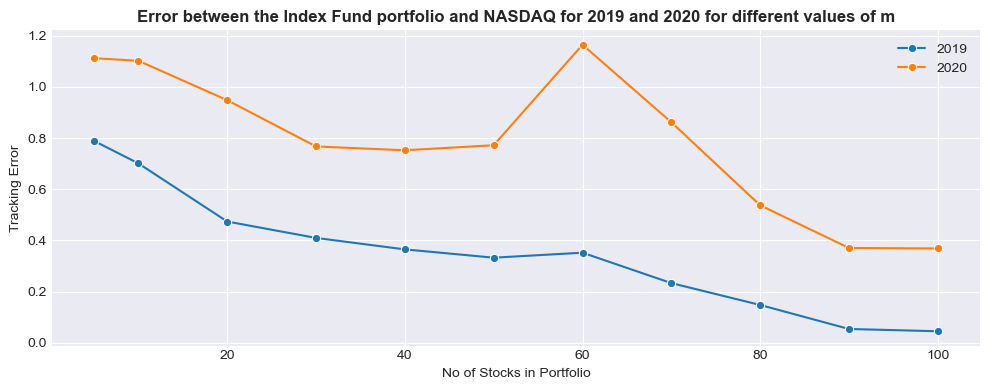

In [24]:
# Converting list to numpy array
obj_19 = np.array(obj_19)
obj_20 = np.array(obj_20)

# Now we will plot the Total Absolute Deviation between the Index Fund portfolio and NASDAQ for 2019 and 2020 for different values of m
plt.figure(figsize=(10, 4))
sns.lineplot(x=Results.index.values, y=obj_19.ravel(),
             label="2019", marker="o")
sns.lineplot(x=Results.index.values, y=obj_20.ravel(),
             label="2020", marker="o")
plt.title("Error between the Index Fund portfolio and NASDAQ for 2019 and 2020 for different values of m",
          fontsize=12, fontweight='bold')
plt.xlabel("No of Stocks in Portfolio")
plt.ylabel("Tracking Error")
plt.tight_layout()
plt.show()


<font color='lightgreen'>
On the basis of this graph, we can consider the number of funds for the lowest possible error to be somewhere around 90, after which we get diminishing returns in the reduction of errors
It is also interesting to note a spike in errors for the test data somewhere around m=60
<font>

#### Part 4 : Mixed Integer Solution

In [101]:
import os
M = 10
a = list_of_m


if os.path.exists('portfolio.csv'):
    fund = pd.read_csv('portfolio.csv', index_col=0)
else:
    print(f"The file does not exist.")

    portfolio = pd.DataFrame(index=a, columns=returns_matrix_19.columns)

    for k, m in enumerate(a):
        # Model
        Mixed = gp.Model()
        Mixedy = Mixed.addMVar(n, vtype='B')
        Mixedw = Mixed.addMVar(n)
        Mixedz = Mixed.addMVar(p)

        Mixed.setObjective(gp.quicksum(Mixedz[i]
                           for i in range(p)), gp.GRB.MINIMIZE)

        # Adding Constraints
        Mixed.addConstr(gp.quicksum(Mixedw[i] for i in range(n)) == 1)
        Mixed.addConstr(gp.quicksum(Mixedy[i] for i in range(n)) == m)
        Mixed.addConstrs(Mixedw[i] <= M*Mixedy[i] for i in range(n))

        # Constraints
        Mixed.addConstrs(Mixedz[i] >= q_2019[i] -
                         gp.quicksum(
                             Mixedw[j]*returns_matrix_19.iloc[i, j] for j in range(n))
                         for i in range(p))
        Mixed.addConstrs(Mixedz[i] >= gp.quicksum(Mixedw[j]*returns_matrix_19.iloc[i, j] for j in range(n))
                         - q_2019[i] for i in range(p))

        Mixed.Params.OutputFlag = 0
        Mixed.Params.TimeLimit = stop_time
        Mixed.optimize()
        Mixed.ObjVal
        portfolio.iloc[k, :] = Mixedw.x

    portfolio.to_csv('portfolio.csv')
    portfolio.head()


In [102]:
portfolio.head()


,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250123,0.0,0.113758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.114703,0.0,0.127589,0.0,0.0,...,0.0,0.0,0.0,0.12265,0.0,0.0,0.0,0.0,0.0,0.05127
20,0.0,0.0,0.0,0.0,0.0,0.093409,0.0,0.09575,0.041556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024848
30,0.0,0.040111,0.0,0.0,0.0,0.0,0.082867,0.103849,0.0,0.0,...,0.0,0.0,0.0,0.0,0.009346,0.0,0.0,0.0,0.0,0.0
40,0.008821,0.021263,0.006376,0.0,0.0,0.08211,0.0,0.102633,0.010834,0.0,...,0.0047,0.004909,0.0,0.0,0.0,0.010968,0.0,0.0,0.0,0.0


In [103]:
# Reading the csv file with weights for each case of m                                                                      ``          `   `   `   ```
fund = pd.read_csv('portfolio.csv', index_col=0)

portfolio_performance_2019 = []
portfolio_performance_2020 = []

for k in range(len(fund)):

    m = fund.index.values[k]

    #  Difference in daily returns of NDX and Portfolio in 2019
    perf_2019 = sum(abs(q_2019[i] - sum(fund.iloc[k, j]*returns_matrix_19.iloc[i, j]
                                        for j in range(n))) for i in range(len(returns_19)))
    portfolio_performance_2019.append(perf_2019)

    #  Difference in daily returns of NDX and Portfolio in 2020
    perf_2020 = sum(abs(q_2020[i] - sum(fund.iloc[k, j]*returns_matrix_20.iloc[i, j]
                                        for j in range(n))) for i in range(len(returns_20)))
    portfolio_performance_2020.append(perf_2020)

# Defining a data frame to store the errors in 2019 and 2020
comparison_matrix = pd.DataFrame(index=fund.index, data={'m': fund.index,
                                                         'performance_2019': portfolio_performance_2019,
                                                         'performance_2020': portfolio_performance_2020})
comparison_matrix


,m,performance_2019,performance_2020
5,5,0.499259,0.777362
10,10,0.303570,0.691485
20,20,0.163905,0.578164
30,30,0.112807,0.420388
40,40,0.081795,0.452076
50,50,0.065133,0.382616
60,60,0.051930,0.374241
70,70,0.047944,0.365412
80,80,0.045227,0.370629
90,90,0.044911,0.368682


In [104]:
m_values = comparison_matrix['m']


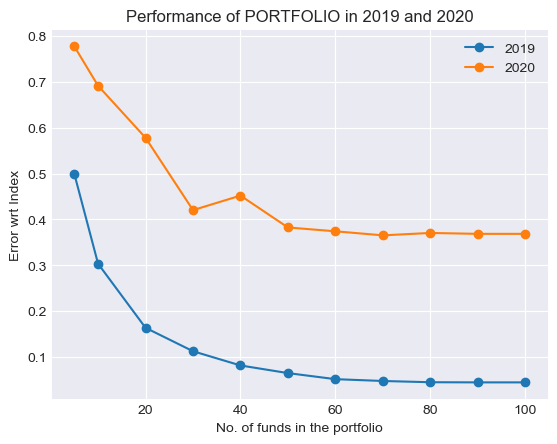

In [105]:
plt.plot(
    m_values, comparison_matrix['performance_2019'], label='2019', marker='o')
plt.plot(
    m_values, comparison_matrix['performance_2020'], label='2020', marker='o')
plt.ylabel('Error wrt Index')
plt.xlabel('No. of funds in the portfolio')
plt.title('Performance of PORTFOLIO in 2019 and 2020')
plt.legend()
plt.show()

<font color='lightgreen'>
On the basis of this graph we can consider the number of funds for the lowest possible error to be around 50, after which we get diminishing returns in the reduction of errors
<font>

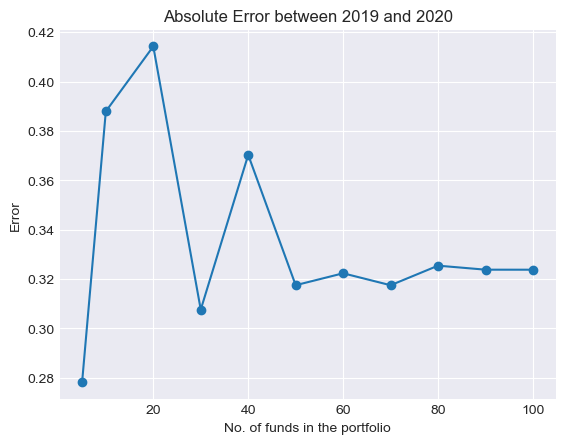

In [109]:
abs_error = abs(np.subtract(
    comparison_matrix['performance_2020'], comparison_matrix['performance_2019']))

plt.plot(
    m_values, abs_error, marker='o')
plt.ylabel('Error')
plt.xlabel('No. of funds in the portfolio')
plt.title('Absolute Error between 2019 and 2020')
plt.show()


<font color='lightgreen'>
After incorporating 40 stocks, the gains start to taper off. Yet, the performance plateaus, suggesting that a portfolio with 40 stocks mirrors the performance of one with 100 stocks quite closely. 
<font>

In [107]:
comparison_matrix['Part 3 Performance 2019'] = Results['ObjVal_19']
comparison_matrix['Part 3 Performance 2020'] = Results['ObjVal_20']
comparison_matrix

,m,performance_2019,performance_2020,Part 3 Performance 2019,Part 3 Performance 2020
5,5,0.499259,0.777362,0.789178,1.112437
10,10,0.303570,0.691485,0.701218,1.102404
20,20,0.163905,0.578164,0.473874,0.948283
30,30,0.112807,0.420388,0.409792,0.767367
40,40,0.081795,0.452076,0.365005,0.752512
50,50,0.065133,0.382616,0.332540,0.772100
60,60,0.051930,0.374241,0.352056,1.164932
70,70,0.047944,0.365412,0.233143,0.861893
80,80,0.045227,0.370629,0.147683,0.537323
90,90,0.044911,0.368682,0.053827,0.370506


<font color='lightgreen'>
We can see that the errors are much lower when we solve the problem through the method mentioned in Part 4. If we increased the time limit from 1 hour per value of m to, we would observe even lower errors.
<font>

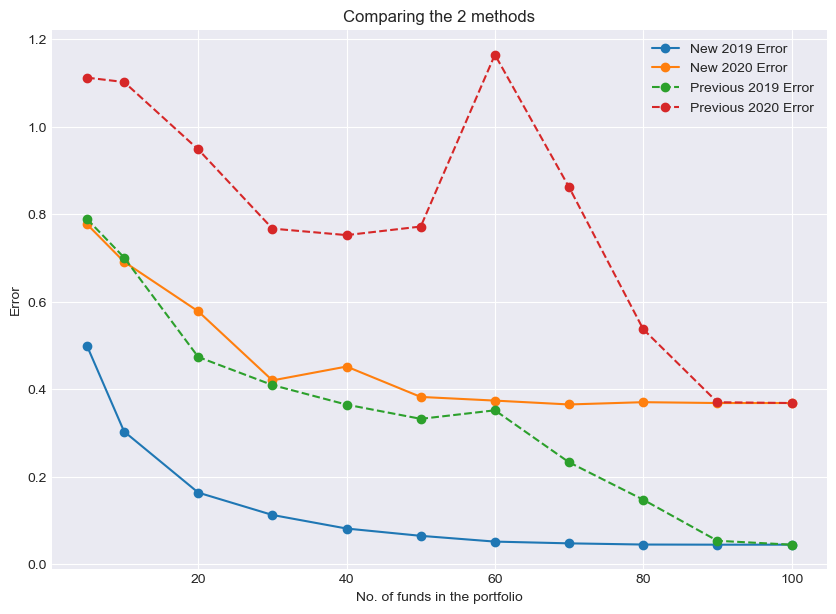

In [108]:
plt.figure(figsize=(10, 7))
plt.plot(m_values, comparison_matrix['performance_2019'],
         label='New 2019 Error', marker='o')
plt.plot(m_values, comparison_matrix['performance_2020'],
         label='New 2020 Error', marker='o')
plt.plot(m_values, comparison_matrix['Part 3 Performance 2019'],
         label='Previous 2019 Error', linestyle='--', marker='o')
plt.plot(m_values, comparison_matrix['Part 3 Performance 2020'],
         label='Previous 2020 Error', linestyle='--', marker='o')
plt.ylabel('Error')
plt.xlabel('No. of funds in the portfolio')
plt.title('Comparing the 2 methods')
plt.legend()
plt.show()

<font color='lightgreen'>
Based on this, we can notice that Method 2 (i.e., MIP Model) consistently outperforms Method 1 across most values of 'm', achieving optimal results around m=50,
<font>

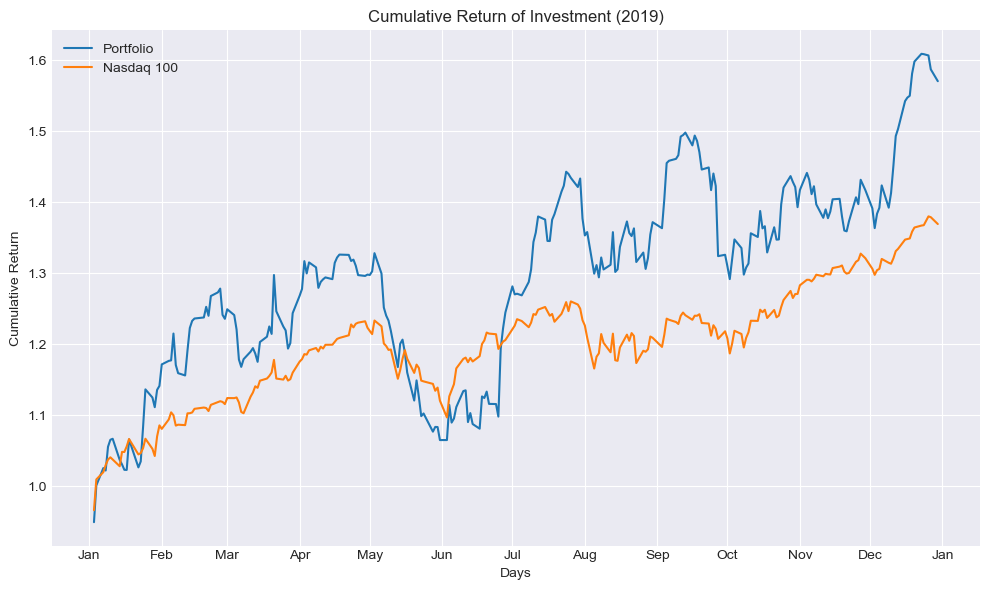

In [71]:
indices = returns_19.columns.tolist()
selected_stock_ticks = [indices[ind] for ind in selected_stock_index]
returns_19['Port'] = returns_19[selected_stock_ticks].dot(list(selected_stock_weights))
# Plot the cumulative return graph to show how an initial investment grows
INXvsQQQ19 = pd.concat([ returns_19['Port'] , returns_19.iloc[:, 0]], axis=1).add(1).cumprod()
plt.figure(figsize=(10,6))
plt.plot(INXvsQQQ19.iloc[:, 0], label='Portfolio')
plt.plot(INXvsQQQ19.iloc[:, 1], label='Nasdaq 100')
plt.title('Cumulative Return of Investment (2019)')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
# Adjust x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to be on every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display ticks as 'Month Year'
plt.tight_layout()
plt.show()



<font color ='lightgreen'>
The relative heights of the graphs suggest that the optimal 5-stock portfolio outperformed the market in 2019
<font>

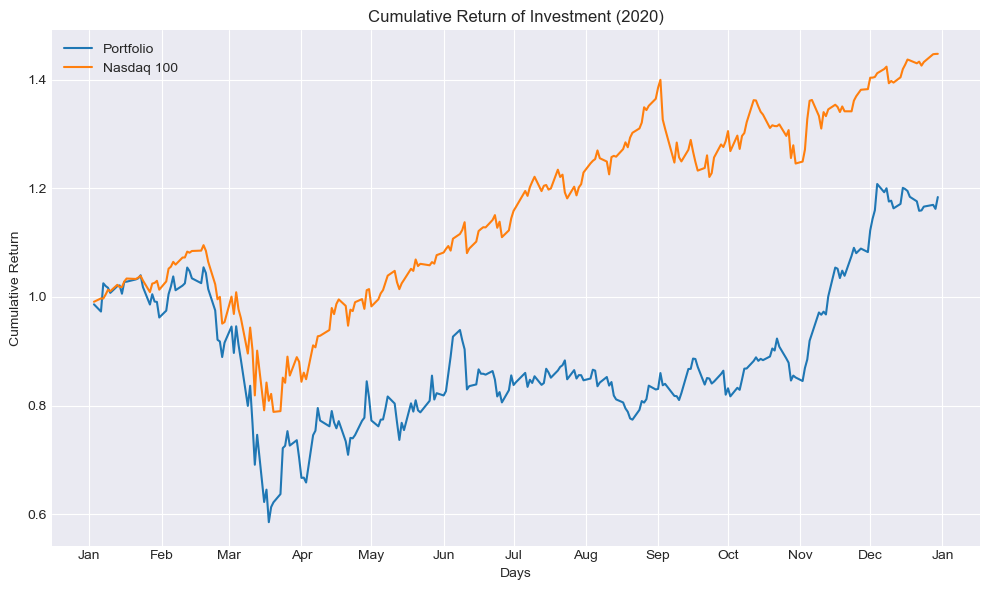

In [73]:
returns_20['Port'] = returns_20[selected_stock_ticks ].dot(
    list(selected_stock_weights))
# Plot the cumulative return graph to show how an initial investment grows
INXvsQQQ20 = pd.concat(
    [returns_20['Port'], returns_20.iloc[:, 0]], axis=1).add(1).cumprod()
plt.figure(figsize=(10, 6))
plt.plot(INXvsQQQ20.iloc[:, 0], label='Portfolio')
plt.plot(INXvsQQQ20.iloc[:, 1], label='Nasdaq 100')
plt.title('Cumulative Return of Investment (2020)')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
# Adjust x-axis to show months
ax = plt.gca()
# Set major ticks to be on every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Display ticks as 'Month Year'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()
plt.show()

<font color ='lightgreen'>
The relative heights of the graphs suggest that the optimal 5-stock portfolio underperformed the market in 2020
<font>